In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [9]:
#load the data from the API
crime_data_url = 'https://data.lacity.org/resource/2nrs-mtv8.csv'
crime_df = pd.read_csv(crime_data_url)

In [14]:
# Display basic info about the dataset
print(crime_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   dr_no           1000 non-null   int64         
 1   date_rptd       1000 non-null   datetime64[ns]
 2   date_occ        1000 non-null   object        
 3   time_occ        1000 non-null   int64         
 4   area            1000 non-null   int64         
 5   area_name       1000 non-null   object        
 6   rpt_dist_no     1000 non-null   int64         
 7   part_1_2        1000 non-null   int64         
 8   crm_cd          1000 non-null   int64         
 9   crm_cd_desc     1000 non-null   object        
 10  mocodes         905 non-null    object        
 11  vict_age        1000 non-null   int64         
 12  vict_sex        939 non-null    object        
 13  vict_descent    939 non-null    object        
 14  premis_cd       1000 non-null   int64         
 15  premi

In [13]:
# Data cleaning - Convert the Date Reported column to datetime format
crime_df['date_rptd'] = pd.to_datetime(crime_df['date_rptd'])

In [15]:
# Extract the year and month from the 'Date Reported' column
crime_df['Year'] = crime_df['date_rptd'].dt.year
crime_df['Month'] = crime_df['date_rptd'].dt.month_name()

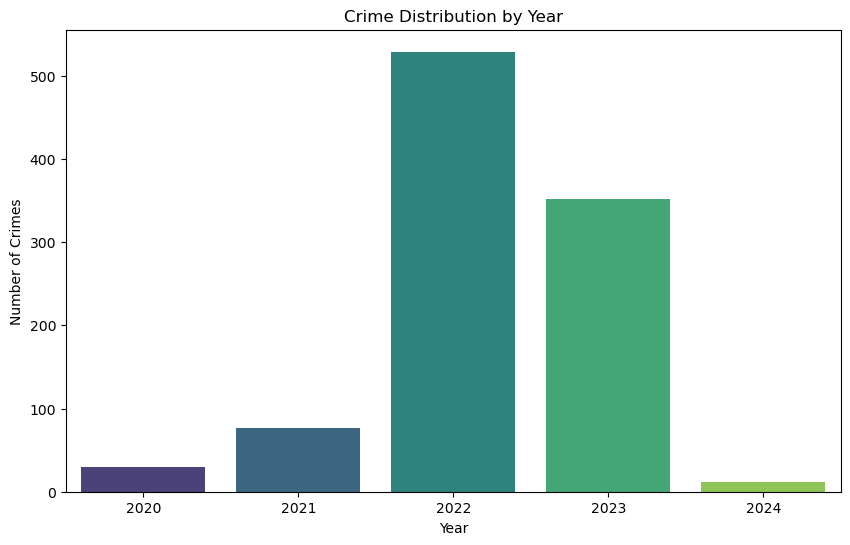

In [16]:
# Analyze crime distribution by year
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=crime_df, palette='viridis')
plt.title('Crime Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

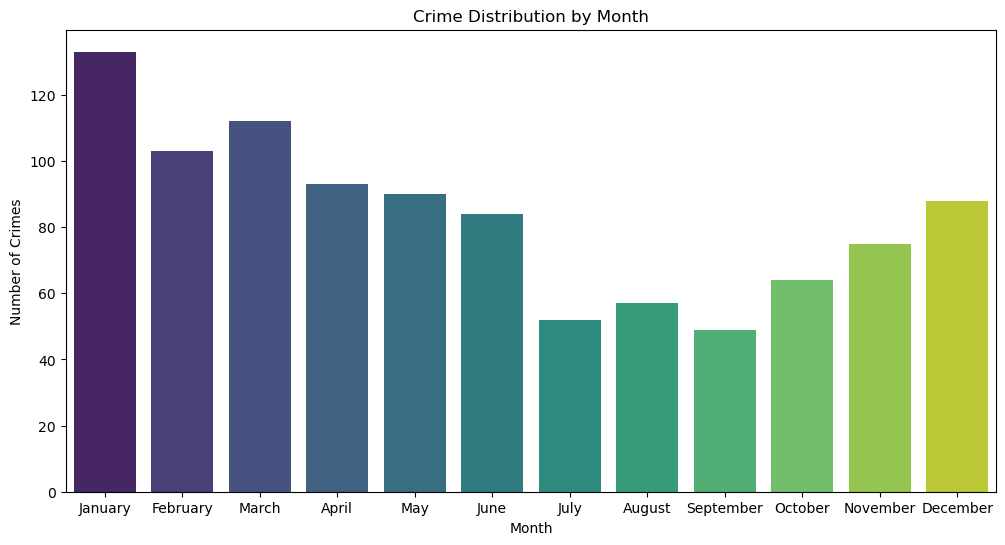

In [17]:
# Crime distribution by month
plt.figure(figsize=(12,6))
sns.countplot(x='Month', data = crime_df, order=['January','February','March','April','May','June','July','August','September','October','November','December'],palette='viridis')
plt.title('Crime Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

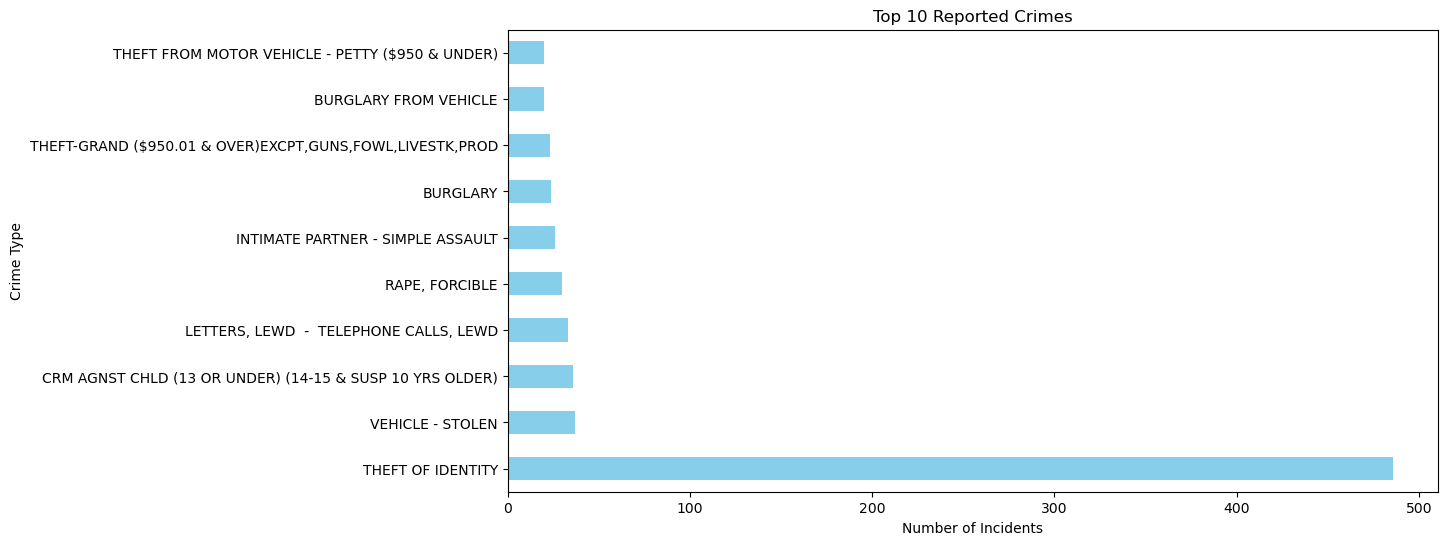

In [23]:
# top 10 reported crimes
top_crimes = crime_df['crm_cd_desc'].value_counts().head(10)
plt.figure(figsize=(12,6))
top_crimes.plot(kind='barh',color='skyblue')
plt.title('Top 10 Reported Crimes')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Type')
plt.show()

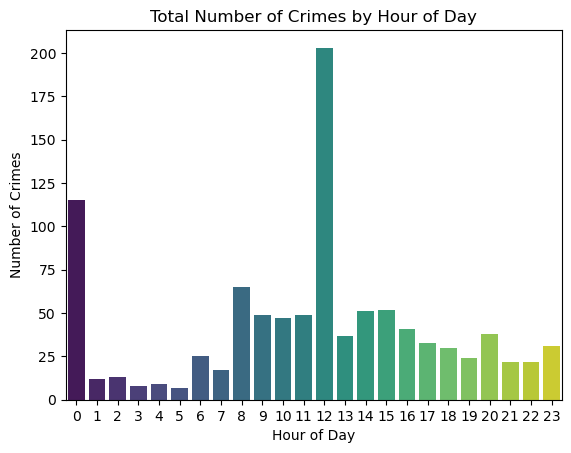

In [76]:
# Crime Distribution by Hour of the Day
# Get times to format so I can parse the hour from them

crime_df['time'] = crime_df['time_occ'].astype(str).str.zfill(4)

# Parse the hour (1-24)

crime_df['hour'] = pd.to_datetime(crime_df['time'], format='%H%M').dt.hour

# Create a countplot
sns.countplot(x='hour', data=crime_df, palette='viridis')

# Show the plot
plt.title('Total Number of Crimes by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.show()

#Why are there so many crimes at 12 PM??


In [79]:
# Where do most crimes occur??
top_locations = crime_df['area'].value_counts().head(5)
print(top_locations)

area
12    97
15    62
13    58
17    55
18    53
Name: count, dtype: int64


In [81]:
# What is most common crime in area 12?
area_12_df = crime_df[crime_df['area'] == 12]
most_common_crm_cd = area_12_df['crm_cd_desc'].value_counts().idxmax()
print(most_common_crm_cd)

THEFT OF IDENTITY


In [83]:
# What is the most common crime in each area?
most_common_crime_per_area = crime_df.groupby('area')['crm_cd_desc'].apply(lambda x: x.value_counts().idxmax())
print(most_common_crime_per_area)

#Wow, identity theft is the most common in each area!

area
1     THEFT OF IDENTITY
2     THEFT OF IDENTITY
3     THEFT OF IDENTITY
4     THEFT OF IDENTITY
5     THEFT OF IDENTITY
6     THEFT OF IDENTITY
7     THEFT OF IDENTITY
8     THEFT OF IDENTITY
9     THEFT OF IDENTITY
10    THEFT OF IDENTITY
11    THEFT OF IDENTITY
12    THEFT OF IDENTITY
13    THEFT OF IDENTITY
14    THEFT OF IDENTITY
15    THEFT OF IDENTITY
16    THEFT OF IDENTITY
17    THEFT OF IDENTITY
18    THEFT OF IDENTITY
19    THEFT OF IDENTITY
20    THEFT OF IDENTITY
21    THEFT OF IDENTITY
Name: crm_cd_desc, dtype: object


In [84]:
#Where is my vehicle most likely to get stolen?
vehicle_stolen_df = crime_df[crime_df['crm_cd_desc'] == 'VEHICLE - STOLEN']
area_highest_count = vehicle_stolen_df['area'].value_counts().idxmax()
print(area_highest_count)

# 2 is the Rampart Area of LA

2
